In [1]:
import pandas as pd


## Cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()


In [3]:
# cancer_data

In [4]:
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target


In [5]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

In [7]:
df.target.value_counts(normalize=True)


1    0.627417
0    0.372583
Name: target, dtype: float64

In [8]:
X = df.iloc[:, :-1]
y = df['target']

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Random Forest Classification model on the Training set


In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,max_depth=15)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=10)

## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9976525821596244
Accuracy Score on test data:  0.9790209790209791


## Evaluation Metrics

In [17]:
from sklearn.metrics import confusion_matrix , classification_report

print("================== Confusion_Matrix =======================")
confusion_matrix(y_test,y_pred)

================== Confusion_Matrix =======================


array([[52,  1],
       [ 2, 88]])

In [20]:
print("================ Classsification_Report ===================")
print(classification_report(y_test,y_pred))

================ Classsification_Report ===================
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Feature Importance

<AxesSubplot:>

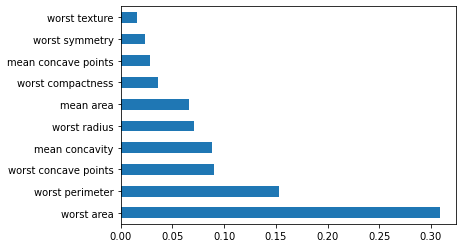

In [116]:
feat_importances = pd.Series(classifier.feature_importances_, index=df.iloc[:, :-1].columns)
feat_importances.nlargest(10).plot(kind='barh')

## AdaBoost

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [118]:
ab = AdaBoostClassifier(n_estimators=600)
ab.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=600)

In [119]:
ab.score(X_test,y_test)


0.9790209790209791

## Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingRegressor


In [121]:
gbt = GradientBoostingRegressor(n_estimators=1000)
gbt.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=1000)

In [123]:
gbt.score(X_train,y_train)


0.9999999315817187

In [122]:
gbt.score(X_test,y_test)


0.8564511415557224

## Hyperparameter Tuning

Hyperparamter tuning is process for finding the right hyperparameter which provides best accuracy.

### Grid Search

Grid search is a technique which tends to find the right set of hyperparameters for the particular model.

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [60,70,80,90,100], 
     'max_features': [11,12,13,14]}
]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid)
grid_search.fit(X_train, y_train)


In [ ]:
# The best hyperparameter combinations

grid_search.best_params_

In [ ]:
pred= grid_search.predict(X_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

### Random Search 

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model.


In [ ]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'max_depth': randint(low=1 ,high=30)
    }

forest_reg = RandomForestClassifier()

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs)
rnd_search.fit(X_train, y_train)


In [ ]:
# The best hyperparameter combinations

rnd_search.best_params_

In [ ]:
pred= grid_search.predict(X_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc